## Tarea 7 -  El papel de la heurística | Problema del Laberinto
    Explicación y Solución de Ángel Arreola
    

#### Introducción al Problema del Laberinto

El laberinto que nos presentan es un clásico desafío de búsqueda de caminos donde se necesita encontrar una ruta desde un punto de inicio a un punto de destino. Estos problemas son frecuentes en el ámbito de la inteligencia artificial y los juegos de computadora, donde se busca que un agente (como un personaje o un robot) navegue de manera eficiente a través de un espacio con obstáculos.

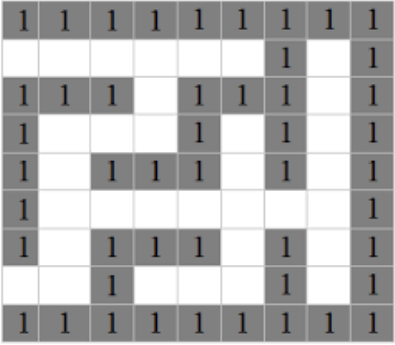

#### ¿Qué es la Heurística?

La heurística, en el contexto de la resolución de problemas y la inteligencia artificial, es una técnica que permite tomar decisiones rápidas y efectivas con un razonamiento simplificado que no garantiza ser perfecto, pero es suficientemente bueno para el propósito en cuestión. La heurística se utiliza para hacer estimaciones en situaciones donde una solución exhaustiva y completa puede ser demasiado costosa o incluso imposible de calcular en un tiempo razonable.

#### Papel de la Heurística en la Resolución de Problemas

En problemas de laberintos, la heurística ayuda a estimar la distancia desde cualquier punto del laberinto hasta la meta. Una heurística común es la distancia Manhattan, que calcula la distancia entre dos puntos que se mueven solo en direcciones horizontales y verticales, como si estuvieran en una cuadrícula de calles de la ciudad.

Para nuestro laberinto, la heurística podría ser el número de pasos mínimos necesarios para llegar a la salida sin considerar los obstáculos. Esto nos dará una guía para decidir qué caminos son más prometedores y cuáles deberían ser explorados primero.

#### Solución con Recursividad

Para resolver el laberinto de manera recursiva, podríamos implementar un algoritmo de búsqueda en profundidad (DFS, por sus siglas en inglés). Este algoritmo explora el laberinto moviéndose a un cuadro adyacente en cada paso y llamándose a sí mismo recursivamente para continuar la exploración. Si encuentra un obstáculo o un camino sin salida, retrocede y prueba una ruta alternativa.

#### Propuesta de Algoritmo de Solución

Aunque la recursividad es útil, podemos mejorar la búsqueda utilizando un algoritmo informado como A*. Este algoritmo utiliza una heurística para priorizar los caminos que parecen llevar más directamente al objetivo, optimizando así el proceso de búsqueda y encontrando una solución más rápidamente que con el simple DFS.

#### Descripción del Algoritmo

El algoritmo A* mantiene dos listas: una de nodos abiertos (aún por explorar) y otra de nodos cerrados (ya explorados). En cada paso, el algoritmo selecciona el nodo abierto con el menor coste estimado para llegar a la meta, lo mueve a la lista cerrada y explora sus vecinos. Este proceso se repite hasta que el objetivo es alcanzado o se confirma que no hay solución.

In [3]:
matrizProblemaPlanteado = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
]

#### Heurística y Recursividad en la Resolución del Laberinto

En la resolución de laberintos, la heurística puede ser utilizada para guiar la búsqueda hacia la salida de manera más eficiente. En este caso, dado que el laberinto parece ser bastante simple y no se nos ha pedido encontrar el camino más corto, podríamos omitir la heurística y centrarnos en encontrar cualquier camino válido usando un enfoque de búsqueda en profundidad (DFS) de forma recursiva.

#### Solución Recursiva

La búsqueda en profundidad (DFS) explora agresivamente un camino hasta que se encuentra un obstáculo o se alcanza la salida. Si se encuentra con un obstáculo, retrocede y prueba otro camino. Implementaremos una función recursiva que intentará moverse en todas las direcciones posibles (arriba, abajo, izquierda, derecha) desde la posición actual. Si logra llegar a la salida, retornará el camino encontrado.

#### Propuesta de Algoritmo de Solución

Aunque la DFS es suficiente para este laberinto, en problemas más complejos se puede utilizar algoritmos como A* o Dijkstra que hacen uso de heurísticas para encontrar el camino más corto. Estos algoritmos serían una sobreingeniería para el problema actual, así que nos quedaremos con la DFS.

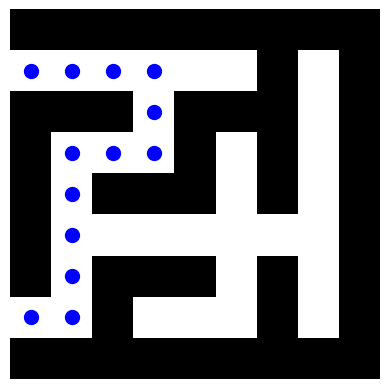

In [6]:
import matplotlib.pyplot as plt
def find_path(maze, position, end, path=[]):
    # Añadir la posición actual al camino
    path = path + [position]

    # Verificar si la posición actual es la salida
    if position == end:
        return path

    # Obtener las dimensiones del laberinto
    n, m = len(maze), len(maze[0])

    # Lista para almacenar posibles movimientos (arriba, abajo, izquierda, derecha)
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Explorar todos los movimientos posibles
    for move in moves:
        # Calcular la nueva posición
        new_position = (position[0] + move[0], position[1] + move[1])

        # Verificar si la nueva posición está dentro del laberinto y no es una pared
        if (0 <= new_position[0] < n and 0 <= new_position[1] < m and
                maze[new_position[0]][new_position[1]] == 0 and
                new_position not in path):
            # Explorar recursivamente desde la nueva posición
            new_path = find_path(maze, new_position, end, path)
            # Si se encuentra un camino, devolverlo
            if new_path:
                return new_path

    # Si no se encuentra camino, devolver None
    return None

# Definir el laberinto usando la matriz proporcionada
maze = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 0, 1, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1]
]

# Definir las posiciones de inicio (entrada) y final (salida)
start = (7, 0)
end = (1, 0)

# Encontrar el camino desde el inicio hasta el final
path = find_path(maze, start, end)

path  # Mostrar el camino encontrado


# --- Graficacion de el path resultante. ---
# Crear una figura y un subplot
fig, ax = plt.subplots()

# Dibujar el laberinto: los muros son blancos y el camino es negro
ax.imshow(maze, cmap=plt.cm.binary)

# Dibujar el camino: cada paso en el camino es un punto azul
for y, x in path:
    ax.plot(x, y, "o", color="blue", markersize=10)

# Establecer el rango para que los bloques sean cuadrados
ax.set_aspect('equal')

# Desactivar los ejes
ax.axis('off')

# Mostrar el laberinto con el camino
plt.show()


La función recursiva ha encontrado un camino a través del laberinto desde la entrada hasta la salida. Aquí está el camino que se debe seguir, con cada elemento de la lista representando una posición en el laberinto, donde el primer número es la fila y el segundo número es la columna:

```plaintext
[(7, 0), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (3, 2), (3, 3), (2, 3), (1, 3), (1, 2), (1, 1), (1, 0)]
```

Esto indica que comenzamos en la posición `(7, 0)` y nos movemos hacia la derecha, hacia arriba y luego hacia la izquierda para llegar a la salida en `(1, 0)`.

La función `find_path` toma el laberinto y una posición inicial, luego se llama a sí misma para cada posible movimiento hasta que encuentra la salida. Si se encuentra con un callejón sin salida, vuelve atrás (backtracks) y prueba un camino diferente. Este es un ejemplo clásico de búsqueda en profundidad (DFS) aplicada a un laberinto.